In [41]:
!pip install transformers
!pip install pyLDAvis
!pip install nltk
import nltk
nltk.download('omw-1.4')

[nltk_data]     C:\Users\nitin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!



True

In [42]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nitin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\nitin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\nitin\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nitin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nitin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [43]:
# Import required libraries, functions and classes

#Numpy and pandas for dataframes
import numpy as np
import pandas as pd

# nltk library for tokenization, lemmatizer, stopwords, pos tags and FreqDist
# import string for punctuation and str manipulations
import nltk
from nltk.tokenize import word_tokenize,TweetTokenizer
from nltk.tag import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist
from nltk.corpus import stopwords
import string

#Gensim library for LDA model creation . Corpora in gensim to create the id2word Dictionary and corpus of terms
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel

#visualization using matplotlib and pyLDAvis for the LDA model viz
import matplotlib.pyplot as plt
import pyLDAvis
import pyLDAvis.gensim_models

#import warnings to ignore deprecation warning
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)

In [44]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from gensim.models import LdaModel
from gensim.models.nmf import Nmf
from gensim.models.coherencemodel import CoherenceModel
import numpy as np

df = pd.read_excel('part-2.xlsx')

In [45]:
from transformers import AutoTokenizer, AutoModel
import torch
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

In [46]:
df1 = df[['Head Line', 'Review', 'Places', 'Destination','Votes']]
df1 = df1.dropna(how='all', inplace=False)
null_rows = df1.isnull().sum(axis=1)
print(null_rows)
df1 = df1[null_rows==0]
df1.head()

0       0
1       1
2       0
3       1
4       1
       ..
6864    1
6865    1
6866    0
6867    1
6868    1
Length: 6869, dtype: int64


,Head Line,Review,Places,Destination,Votes
0,"“Clean, inviting zoo with a wide range of anim...",This is an excellent zoo. They have a number o...,Sri Chamarajendra Zoological Gardens Mysore Zoo,Mysore,27.0
2,“Must visit place in mysore”,This is definitely the best zoo i hv visited i...,Sri Chamarajendra Zoological Gardens Mysore Zoo,Mysore,5.0
5,“Zoom In to this Zoo!!”,one of the best zoos i have visited in india. ...,Sri Chamarajendra Zoological Gardens Mysore Zoo,Mysore,22.0
6,“Must visit!”,Ranked#2 apparently in the country; it is defi...,Sri Chamarajendra Zoological Gardens Mysore Zoo,Mysore,7.0
9,“One of the best zoos of India”,One of the best Zoos of the country. Tour arou...,Sri Chamarajendra Zoological Gardens Mysore Zoo,Mysore,38.0


In [47]:
null_rows = df1.isnull().sum(axis=1)
print(null_rows)

0       0
2       0
5       0
6       0
9       0
       ..
6856    0
6858    0
6859    0
6861    0
6866    0
Length: 4620, dtype: int64


In [48]:
df=df1

In [49]:
filtered_df = df[df['Destination'] =='Badami']
unique_places = filtered_df['Places'].unique()
print(unique_places)

['Badami Cave Temples']


In [50]:
def preprocess_text(text):
  text = text.lower()
  text = text.replace('\n', ' ')
  text = text.replace('_x000d_', ' ')
  text = text.replace(',', ' ')
  text = text.replace('.', ' ')
  text = text.replace('?', ' ')
  text = text.replace('!', ' ')
  text = text.replace(';', ' ')
  text = text.replace(':', ' ')
  text = text.replace('(', ' ')
  text = text.replace(')', ' ')
  return text

df['Review'] = df['Review'].astype(str)
df['Review'] = df['Review'].apply(preprocess_text) 
df1 = df1[df1['Destination'] == 'Badami'] 
df1['Review'] = df1['Review'].apply(lambda review: review.lower()) 


C:\Users\nitin\AppData\Local\Temp\ipykernel_8564\810106171.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Review'] = df1['Review'].apply(lambda review: review.lower())


In [51]:
reviews_df=df1
reviews_df.head()

,Head Line,Review,Places,Destination,Votes
1331,“Fascinating”,the amount of detail that has gone into making...,Badami Cave Temples,Badami,48.0
1332,“Stunning place that one must visit...”,everything from the scenery to the sculpture a...,Badami Cave Temples,Badami,31.0
1333,“Wow!”,this is a must see for people who are touring ...,Badami Cave Temples,Badami,3.0
1334,“Badami cave Tempples”,stunning stone carvings man made caves t...,Badami Cave Temples,Badami,53.0
1335,“do not miss”,if architecture interests you please experien...,Badami Cave Temples,Badami,19.0


In [52]:
reviews_df.count

<bound method DataFrame.count of                                               Head Line  \
1331                                      “Fascinating”   
1332            “Stunning place that one must visit...”   
1333                                             “Wow!”   
1334                             “Badami cave Tempples”   
1335                                      “do not miss”   
...                                                 ...   
1503                       “Why else you go to Badami?”   
1504                  “Shidlaphadi an adventurous trek”   
1506                        “Beautiful and fascinating”   
1507                            “Worth visiting once..”   
1509  “An excellent oeuvre of Brahminical Iconograph...   

                                                 Review               Places  \
1331  the amount of detail that has gone into making...  Badami Cave Temples   
1332  everything from the scenery to the sculpture a...  Badami Cave Temples   
1333  this is a mu

### Task 2: Normalize casings for the review text and extract the text into a list for easier manipulation

In [53]:
review_list = [review for review in reviews_df["Review"]]
review_list[:5]

["the amount of detail that has gone into making the sculptures here is incredible  i'd strongly recommend this place to anyone who has an interest in history      on the other hand  this place also serves as a stark reminder about the amount of destruction caused by non-natural forces  beautiful sculptures without faces  limbs and damaged in entirety - its incredibly painful to comprehend why anyone may cause such harm to such intricate work      facilities at this location are minimal - there's a decent-sized parking lot  getting to the top requires climbing staircases - an activity that could be tough when it's summer  there are no facilities/food at the top - you will have to carry water with you  beware of the monkeys and be very alert  they're aggressive  and will charge when they see anyone carrying food - if you can't handle monkeys  carrying food is best avoided ",
 "everything from the scenery to the sculpture at this site is stunning  the architecture is best appreciated by 

### Task 3:Tokenize the reviews using NLTKs word_tokenize function.

In [54]:
# Tokenize the reviews

rev_words = [word_tokenize(review) for review in review_list]
print(rev_words[:5])

[['the', 'amount', 'of', 'detail', 'that', 'has', 'gone', 'into', 'making', 'the', 'sculptures', 'here', 'is', 'incredible', 'i', "'d", 'strongly', 'recommend', 'this', 'place', 'to', 'anyone', 'who', 'has', 'an', 'interest', 'in', 'history', 'on', 'the', 'other', 'hand', 'this', 'place', 'also', 'serves', 'as', 'a', 'stark', 'reminder', 'about', 'the', 'amount', 'of', 'destruction', 'caused', 'by', 'non-natural', 'forces', 'beautiful', 'sculptures', 'without', 'faces', 'limbs', 'and', 'damaged', 'in', 'entirety', '-', 'its', 'incredibly', 'painful', 'to', 'comprehend', 'why', 'anyone', 'may', 'cause', 'such', 'harm', 'to', 'such', 'intricate', 'work', 'facilities', 'at', 'this', 'location', 'are', 'minimal', '-', 'there', "'s", 'a', 'decent-sized', 'parking', 'lot', 'getting', 'to', 'the', 'top', 'requires', 'climbing', 'staircases', '-', 'an', 'activity', 'that', 'could', 'be', 'tough', 'when', 'it', "'s", 'summer', 'there', 'are', 'no', 'facilities/food', 'at', 'the', 'top', '-', 'y

In [55]:
# POS tagging using NLTK pos tagger
pos_tagged_review = [pos_tag(review) for review in rev_words]
print(len(pos_tagged_review))
print(pos_tagged_review[:5])

143
[[('the', 'DT'), ('amount', 'NN'), ('of', 'IN'), ('detail', 'NN'), ('that', 'WDT'), ('has', 'VBZ'), ('gone', 'VBN'), ('into', 'IN'), ('making', 'VBG'), ('the', 'DT'), ('sculptures', 'NNS'), ('here', 'RB'), ('is', 'VBZ'), ('incredible', 'JJ'), ('i', 'JJ'), ("'d", 'MD'), ('strongly', 'RB'), ('recommend', 'VB'), ('this', 'DT'), ('place', 'NN'), ('to', 'TO'), ('anyone', 'NN'), ('who', 'WP'), ('has', 'VBZ'), ('an', 'DT'), ('interest', 'NN'), ('in', 'IN'), ('history', 'NN'), ('on', 'IN'), ('the', 'DT'), ('other', 'JJ'), ('hand', 'NN'), ('this', 'DT'), ('place', 'NN'), ('also', 'RB'), ('serves', 'VBZ'), ('as', 'IN'), ('a', 'DT'), ('stark', 'JJ'), ('reminder', 'NN'), ('about', 'IN'), ('the', 'DT'), ('amount', 'NN'), ('of', 'IN'), ('destruction', 'NN'), ('caused', 'VBN'), ('by', 'IN'), ('non-natural', 'JJ'), ('forces', 'NNS'), ('beautiful', 'JJ'), ('sculptures', 'NNS'), ('without', 'IN'), ('faces', 'VBZ'), ('limbs', 'NNS'), ('and', 'CC'), ('damaged', 'VBN'), ('in', 'IN'), ('entirety', 'NN')

In [56]:
nltk.help.upenn_tagset(tagpattern='NN*')

NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...
NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...
NNPS: noun, proper, plural
    Americans Americas Amharas Amityvilles Amusements Anarcho-Syndicalists
    Andalusians Andes Andruses Angels Animals Anthony Antilles Antiques
    Apache Apaches Apocrypha ...
NNS: noun, common, plural
    undergraduates scotches bric-a-brac products bodyguards facets coasts
    divestitures storehouses designs clubs fragrances averages
    subjectivists apprehensions muses factory-jobs ...


In [57]:
# Limit the data to only terms with noun tags

pos_noun_reviews = []
for review in pos_tagged_review:
    nouns=[]
    for word_tuple in review:
        if "NN" in word_tuple[1]:
            nouns.append(word_tuple)
    pos_noun_reviews.append(nouns)

print(pos_noun_reviews[:50])

[[('amount', 'NN'), ('detail', 'NN'), ('sculptures', 'NNS'), ('place', 'NN'), ('anyone', 'NN'), ('interest', 'NN'), ('history', 'NN'), ('hand', 'NN'), ('place', 'NN'), ('reminder', 'NN'), ('amount', 'NN'), ('destruction', 'NN'), ('forces', 'NNS'), ('sculptures', 'NNS'), ('limbs', 'NNS'), ('entirety', 'NN'), ('anyone', 'NN'), ('harm', 'NN'), ('work', 'NN'), ('facilities', 'NNS'), ('location', 'NN'), ('parking', 'NN'), ('lot', 'NN'), ('staircases', 'NNS'), ('activity', 'NN'), ('summer', 'NN'), ('facilities/food', 'NN'), ('water', 'NN'), ('monkeys', 'NNS'), ('anyone', 'NN'), ('food', 'NN'), ('monkeys', 'NNS'), ('food', 'NN')], [('everything', 'NN'), ('scenery', 'NN'), ('sculpture', 'NN'), ('site', 'NN'), ('architecture', 'NN'), ('guide', 'NN'), ('hotel', 'NN'), ('lot', 'NN'), ('history', 'NN'), ('culture', 'NN'), ('temples', 'NNS'), ('beauty', 'NN'), ('temples', 'NNS'), ('cave', 'NN'), ('temples', 'NNS'), ('day', 'NN'), ('hence', 'NN'), ('idea', 'NN'), ('visits', 'NNS'), ('sites', 'NNS'),

In [58]:
# Exclude any reviews that did not have any nouns as these reviews will be blank or empty sublists []

pos_noun_reviews=[review for review in pos_noun_reviews if len(review)>=1]
print(len(pos_noun_reviews), pos_noun_reviews[:50])

143 [[('amount', 'NN'), ('detail', 'NN'), ('sculptures', 'NNS'), ('place', 'NN'), ('anyone', 'NN'), ('interest', 'NN'), ('history', 'NN'), ('hand', 'NN'), ('place', 'NN'), ('reminder', 'NN'), ('amount', 'NN'), ('destruction', 'NN'), ('forces', 'NNS'), ('sculptures', 'NNS'), ('limbs', 'NNS'), ('entirety', 'NN'), ('anyone', 'NN'), ('harm', 'NN'), ('work', 'NN'), ('facilities', 'NNS'), ('location', 'NN'), ('parking', 'NN'), ('lot', 'NN'), ('staircases', 'NNS'), ('activity', 'NN'), ('summer', 'NN'), ('facilities/food', 'NN'), ('water', 'NN'), ('monkeys', 'NNS'), ('anyone', 'NN'), ('food', 'NN'), ('monkeys', 'NNS'), ('food', 'NN')], [('everything', 'NN'), ('scenery', 'NN'), ('sculpture', 'NN'), ('site', 'NN'), ('architecture', 'NN'), ('guide', 'NN'), ('hotel', 'NN'), ('lot', 'NN'), ('history', 'NN'), ('culture', 'NN'), ('temples', 'NNS'), ('beauty', 'NN'), ('temples', 'NNS'), ('cave', 'NN'), ('temples', 'NNS'), ('day', 'NN'), ('hence', 'NN'), ('idea', 'NN'), ('visits', 'NNS'), ('sites', 'NN

### Lemmatize

In [59]:
# Lemmatize the different forms of the nouns
# POS tags not passed to lemmatizer

wnl = WordNetLemmatizer()
lemmatized_words =[]
for review in pos_noun_reviews:
    lemma_word=[]
    for word in review:
        lemma_word.append(wnl.lemmatize(word[0]))
    lemmatized_words.append(lemma_word)

print(lemmatized_words[:50])

[['amount', 'detail', 'sculpture', 'place', 'anyone', 'interest', 'history', 'hand', 'place', 'reminder', 'amount', 'destruction', 'force', 'sculpture', 'limb', 'entirety', 'anyone', 'harm', 'work', 'facility', 'location', 'parking', 'lot', 'staircase', 'activity', 'summer', 'facilities/food', 'water', 'monkey', 'anyone', 'food', 'monkey', 'food'], ['everything', 'scenery', 'sculpture', 'site', 'architecture', 'guide', 'hotel', 'lot', 'history', 'culture', 'temple', 'beauty', 'temple', 'cave', 'temple', 'day', 'hence', 'idea', 'visit', 'site', 'aihole', 'pattadakal', 'day'], ['people', 'karnataka', 'day'], ['stone', 'carving', 'man', 'level', 'understanding', 'art', 'sculpture', 'music', 'dance', 'year'], ['architecture', 'interest', 'place', 'guide', 'beware', 'monkey', 'sculpture', 'cave', 'time'], ['i', 'experience', 'lot', 'history', 'beauty', 'thing', 'rest', 'heritage', 'world', 'experience', 'child', 'adult', 'step'], ['temple', 'century', 'period', 'monument', 'carving', 'relie

### Remove Stop Words

In [60]:
# The o/p from lemmatizer still has many composite words that still contain emojis , special characters etc.
# Using tweet tokenizer for isolating them better.
tweet_tokenize = TweetTokenizer()

#Create list of stopwords with punctuations.Manually added token ['\s'] as this is usually seperated in tokenize
stop_words = stopwords.words("english")
stop_words = stop_words+list(string.punctuation)+["\'s"]

filtered_rev_words=[]

for review in lemmatized_words:
    filter_words=[]
    for words in review:
        rev_words = []
        rev_words = tweet_tokenize.tokenize(words)
        for word in rev_words:
            if word not in stop_words:
                filter_words.append(word)
    filtered_rev_words.append(filter_words)

In [61]:
# Exclude any reviews that contained only stopwords as these reviews will be blank or empty sublists []
filtered_rev_words=[review for review in filtered_rev_words if len(review)>=1]
print(len(filtered_rev_words),filtered_rev_words[:100])

143 [['amount', 'detail', 'sculpture', 'place', 'anyone', 'interest', 'history', 'hand', 'place', 'reminder', 'amount', 'destruction', 'force', 'sculpture', 'limb', 'entirety', 'anyone', 'harm', 'work', 'facility', 'location', 'parking', 'lot', 'staircase', 'activity', 'summer', 'facilities', 'food', 'water', 'monkey', 'anyone', 'food', 'monkey', 'food'], ['everything', 'scenery', 'sculpture', 'site', 'architecture', 'guide', 'hotel', 'lot', 'history', 'culture', 'temple', 'beauty', 'temple', 'cave', 'temple', 'day', 'hence', 'idea', 'visit', 'site', 'aihole', 'pattadakal', 'day'], ['people', 'karnataka', 'day'], ['stone', 'carving', 'man', 'level', 'understanding', 'art', 'sculpture', 'music', 'dance', 'year'], ['architecture', 'interest', 'place', 'guide', 'beware', 'monkey', 'sculpture', 'cave', 'time'], ['experience', 'lot', 'history', 'beauty', 'thing', 'rest', 'heritage', 'world', 'experience', 'child', 'adult', 'step'], ['temple', 'century', 'period', 'monument', 'carving', 'rel

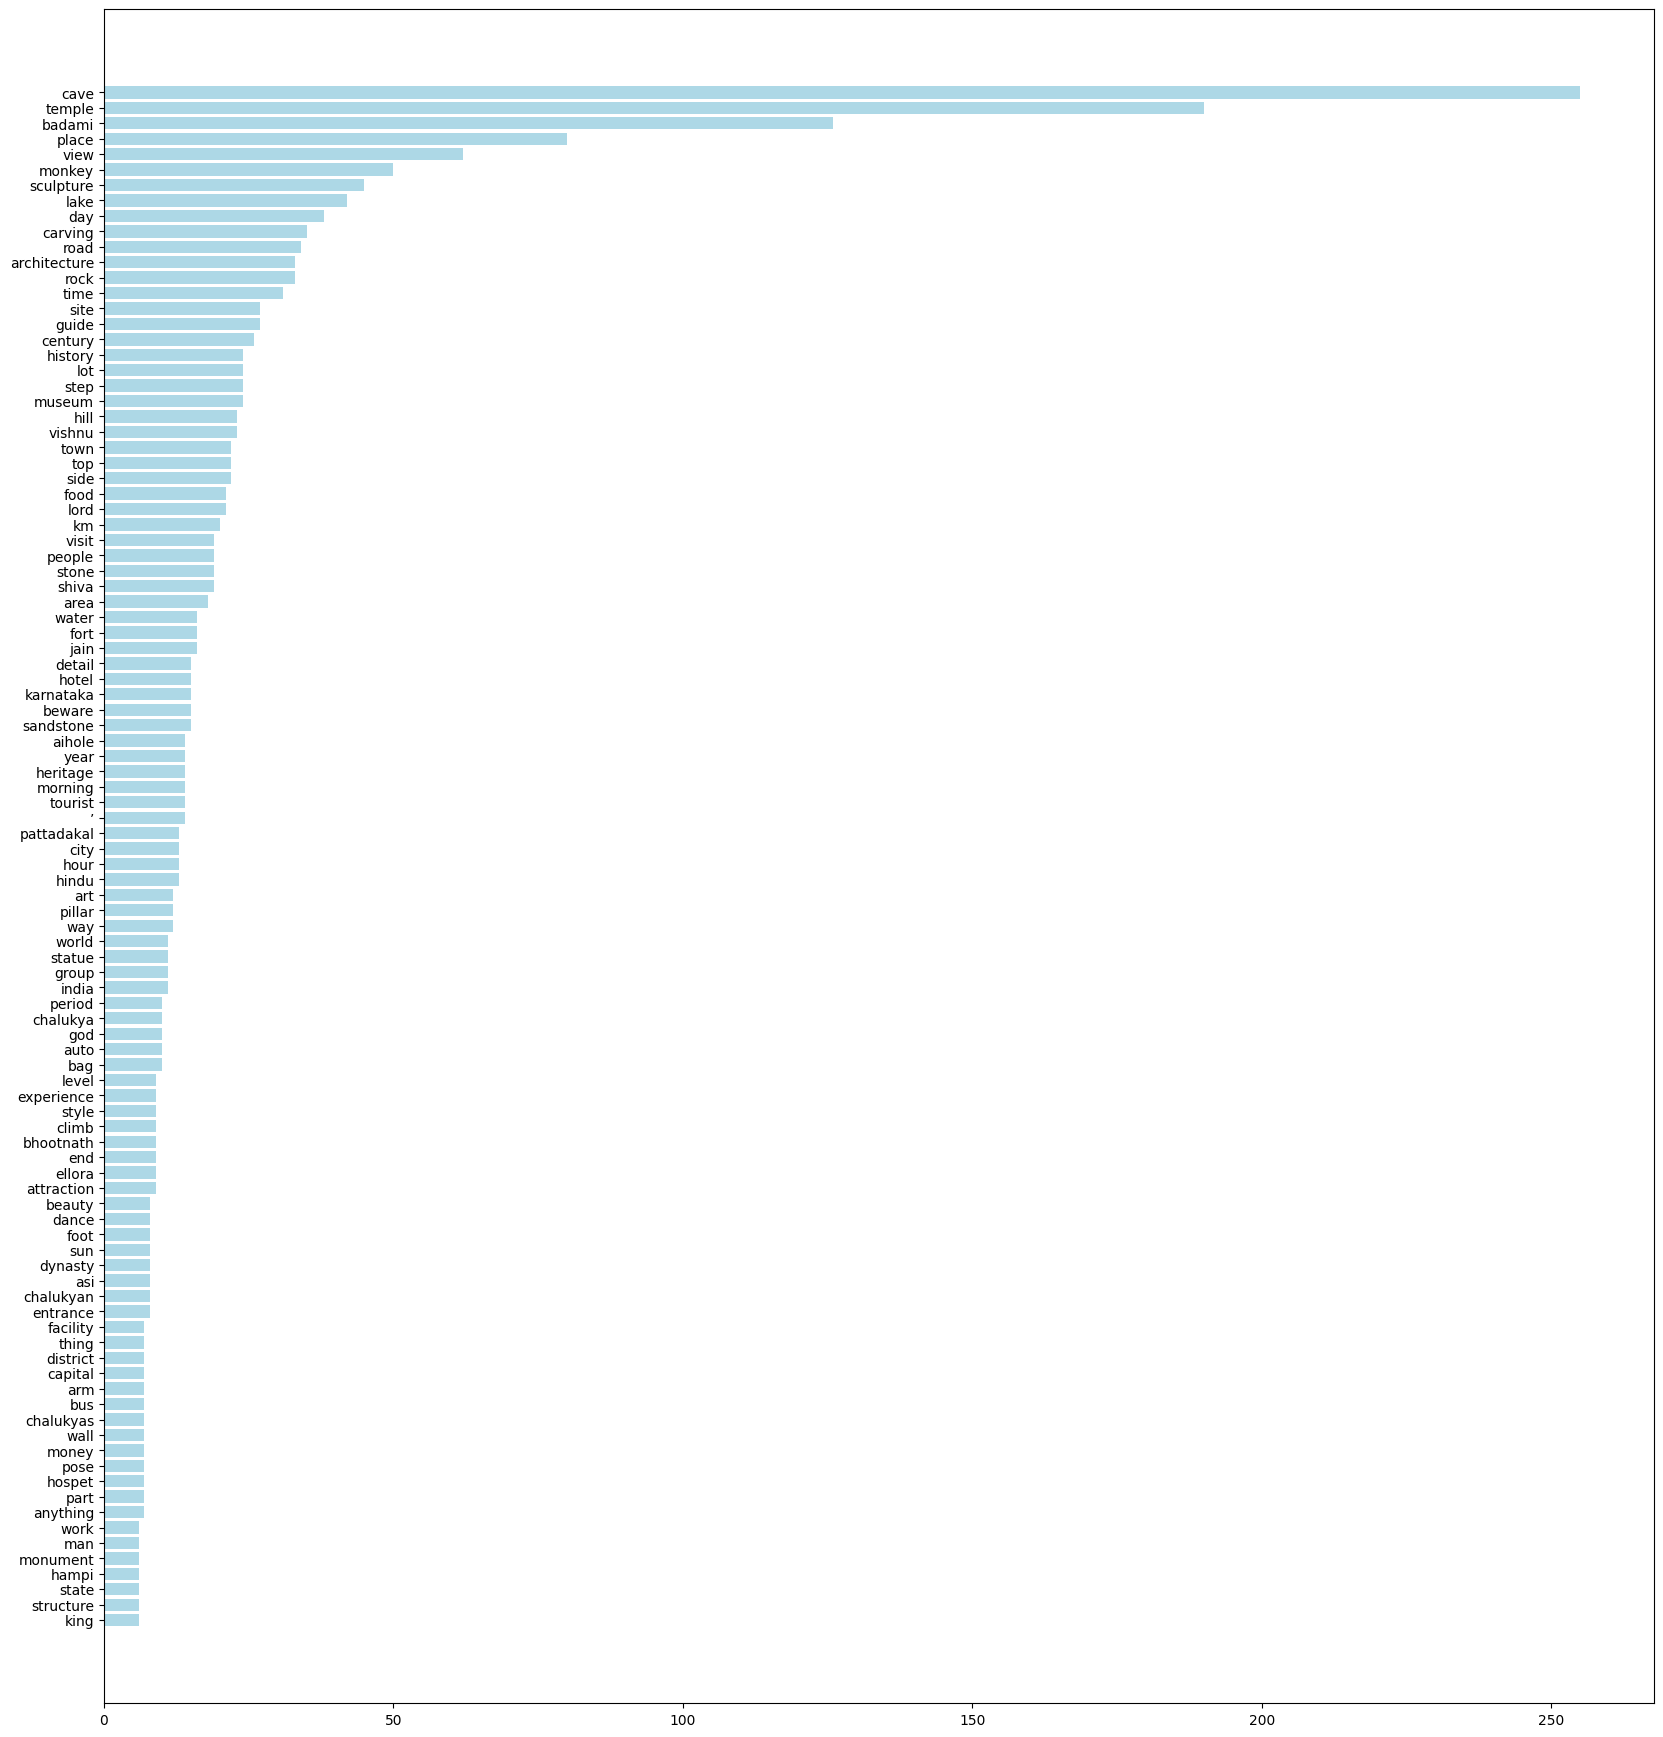

In [62]:
# Barplot to visualize the 100 most common words using FreqDist and barplots

list_of_words = [word for review in filtered_rev_words for word in review]
common_word_freq=FreqDist(list_of_words).most_common(100)
word_list = common_word_freq[::-1]

words,freq = [],[]
for word in word_list:
    words.append(word[0])
    freq.append(word[1])
x=np.array(words)
y=np.array(freq)

plt.figure(figsize=(20,22))
plt.barh(x,y,color="lightblue")
plt.show()

In [63]:
print(common_word_freq)

[('cave', 255), ('temple', 190), ('badami', 126), ('place', 80), ('view', 62), ('monkey', 50), ('sculpture', 45), ('lake', 42), ('day', 38), ('carving', 35), ('road', 34), ('architecture', 33), ('rock', 33), ('time', 31), ('site', 27), ('guide', 27), ('century', 26), ('history', 24), ('lot', 24), ('step', 24), ('museum', 24), ('hill', 23), ('vishnu', 23), ('town', 22), ('top', 22), ('side', 22), ('food', 21), ('lord', 21), ('km', 20), ('visit', 19), ('people', 19), ('stone', 19), ('shiva', 19), ('area', 18), ('water', 16), ('fort', 16), ('jain', 16), ('detail', 15), ('hotel', 15), ('karnataka', 15), ('beware', 15), ('sandstone', 15), ('aihole', 14), ('year', 14), ('heritage', 14), ('morning', 14), ('tourist', 14), ('’', 14), ('pattadakal', 13), ('city', 13), ('hour', 13), ('hindu', 13), ('art', 12), ('pillar', 12), ('way', 12), ('world', 11), ('statue', 11), ('group', 11), ('india', 11), ('period', 10), ('chalukya', 10), ('god', 10), ('auto', 10), ('bag', 10), ('level', 9), ('experienc

In [64]:
# Revising the stopwords based of above analysis
stop_words_inclusions = ["...","..",'phone','lenovo','k8','note','product',
                         'mobile','hai','please','pls','star','hi','ho','ok','handset','part','etc','number','point','thing','everything','mysore']
stop_words = stop_words + stop_words_inclusions


#isalnum() to remove emoji an isnumeric() to remove only number tokens present in the list
#len(word)!=1 will eliminate all one letter tokens such as 'u','i' etc.
final_rev_words = []
for review in filtered_rev_words:
    stopwords_removed_review=[]
    for word in review:
        if word not in stop_words and word.isalnum() and (not word.isnumeric()) and len(word)!=1:
            stopwords_removed_review.append(word)
    final_rev_words.append(stopwords_removed_review)

In [65]:
# Clearing any reviews which are now empty lists after removal of revised stop words
final_rev_words=[review for review in final_rev_words if len(review)>=1]
print(len(final_rev_words),final_rev_words[:50])

143 [['amount', 'detail', 'sculpture', 'place', 'anyone', 'interest', 'history', 'hand', 'place', 'reminder', 'amount', 'destruction', 'force', 'sculpture', 'limb', 'entirety', 'anyone', 'harm', 'work', 'facility', 'location', 'parking', 'lot', 'staircase', 'activity', 'summer', 'facilities', 'food', 'water', 'monkey', 'anyone', 'food', 'monkey', 'food'], ['scenery', 'sculpture', 'site', 'architecture', 'guide', 'hotel', 'lot', 'history', 'culture', 'temple', 'beauty', 'temple', 'cave', 'temple', 'day', 'hence', 'idea', 'visit', 'site', 'aihole', 'pattadakal', 'day'], ['people', 'karnataka', 'day'], ['stone', 'carving', 'man', 'level', 'understanding', 'art', 'sculpture', 'music', 'dance', 'year'], ['architecture', 'interest', 'place', 'guide', 'beware', 'monkey', 'sculpture', 'cave', 'time'], ['experience', 'lot', 'history', 'beauty', 'rest', 'heritage', 'world', 'experience', 'child', 'adult', 'step'], ['temple', 'century', 'period', 'monument', 'carving', 'relief', 'picture', 'remai

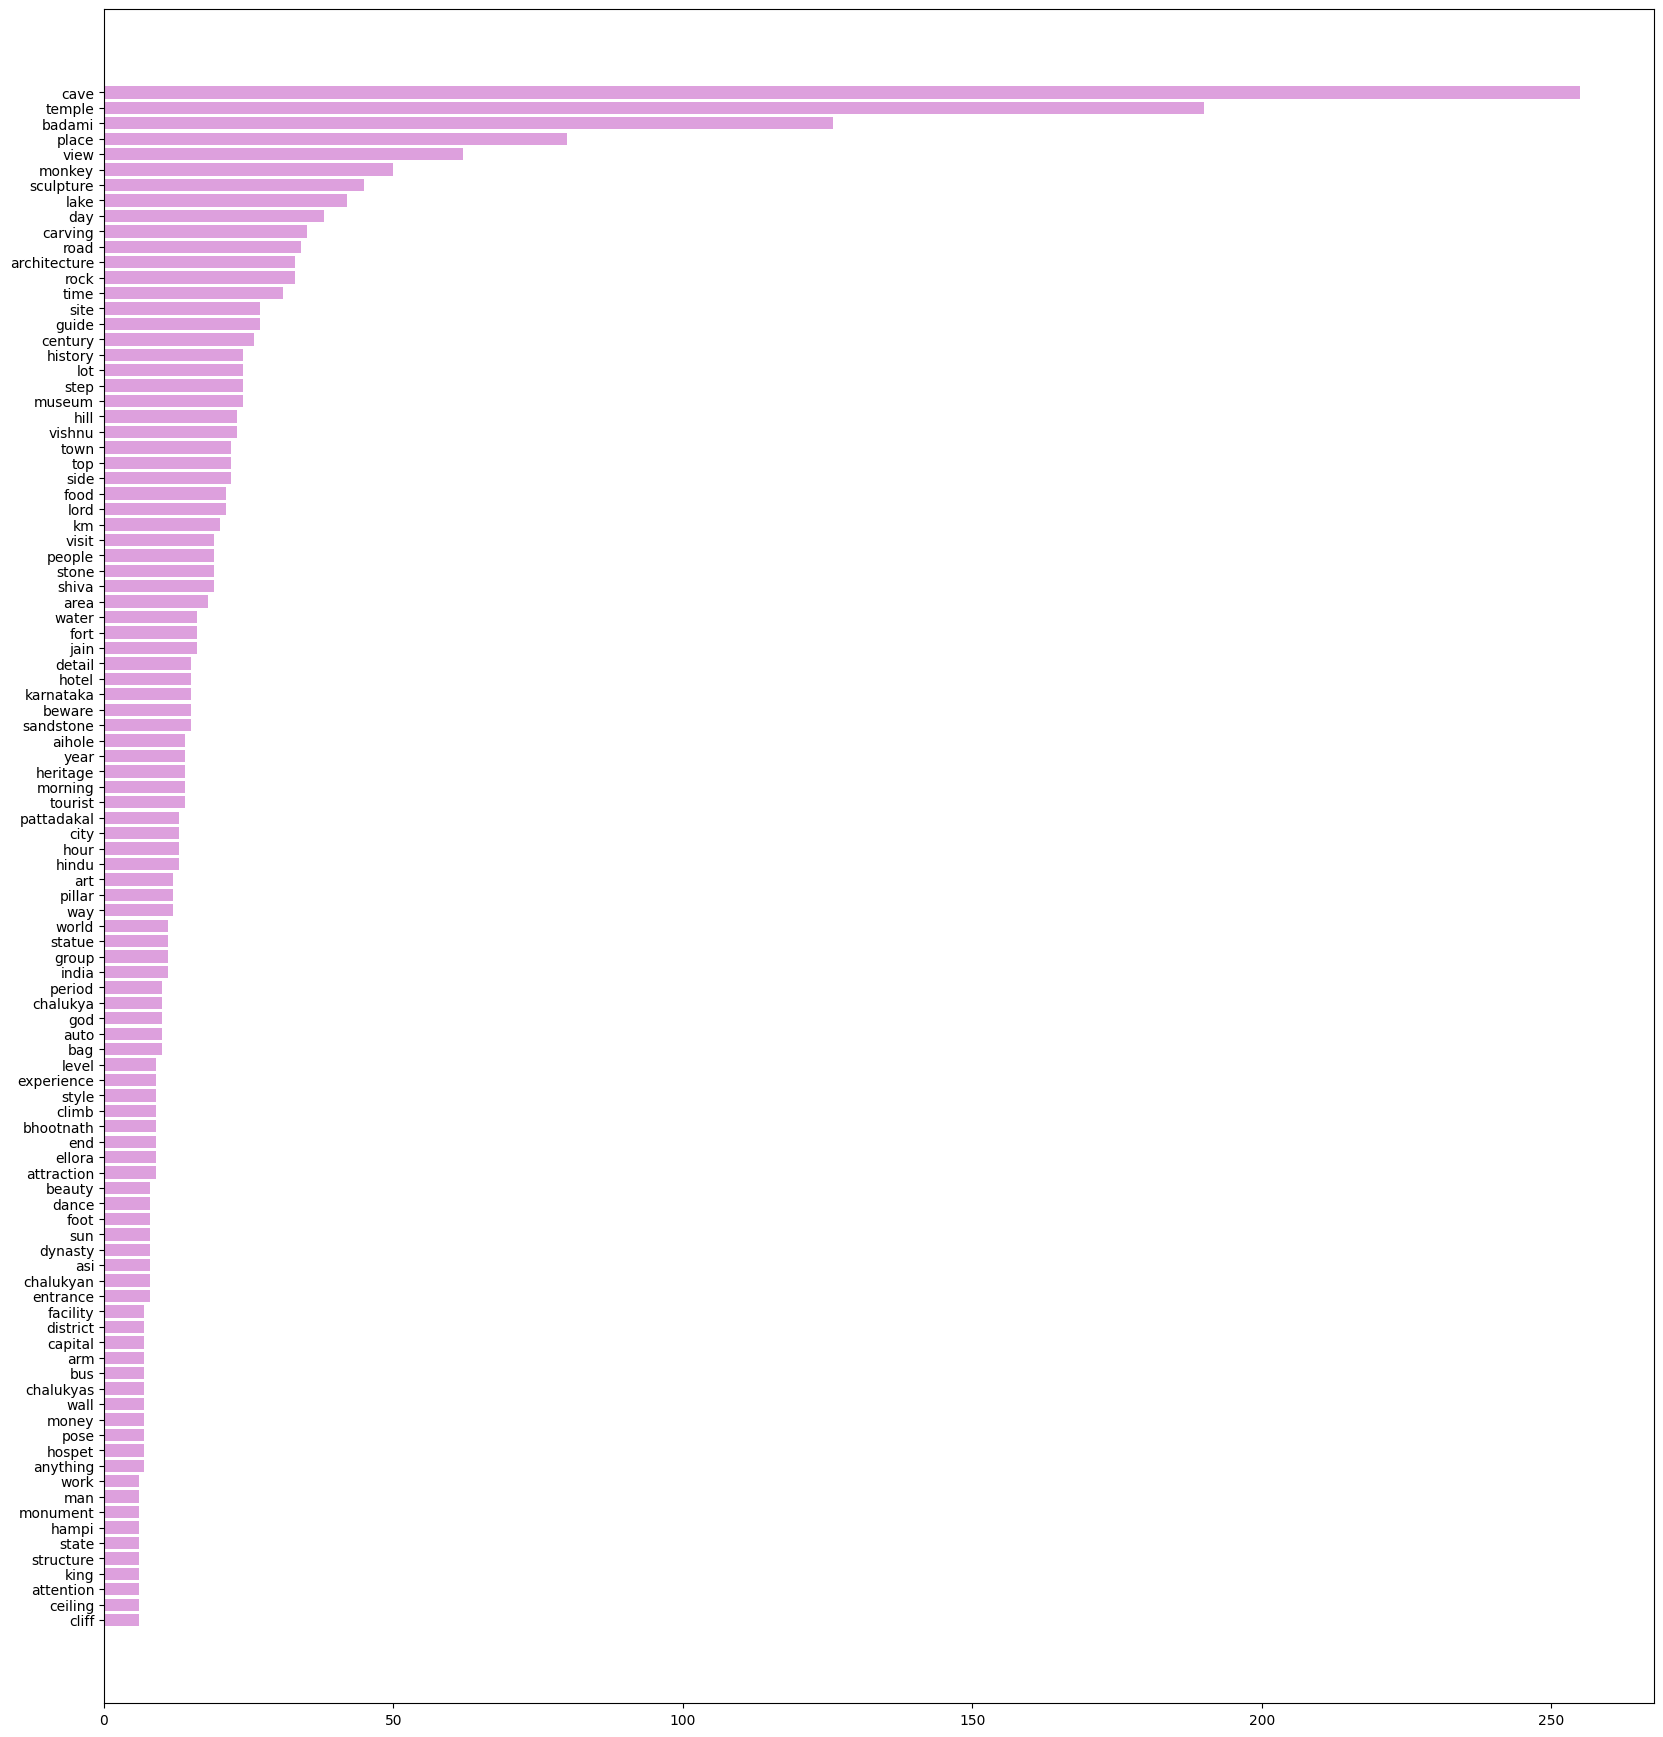

In [66]:
# Barplot to visualize the 100 most common words using FreqDist and barplots

list_of_words = [word for review in final_rev_words for word in review]
word_freq=FreqDist(list_of_words).most_common(100)
word_list_2 = word_freq[::-1]

words,freq = [],[]
for word in word_list_2:
    words.append(word[0])
    freq.append(word[1])
x=np.array(words)
y=np.array(freq)

plt.figure(figsize=(20,22))
plt.barh(x,y,color="plum")
plt.show()

### Task 8: Create a topic model using LDA on the cleaned-up data .

In [67]:
# First creating the id2word Dictionary and corpus of words required for the LDA topic model

id2word = corpora.Dictionary(final_rev_words)

corpus =[]
for review in final_rev_words:
    new = id2word.doc2bow(review)
    corpus.append(new)

print(corpus[:20],"\n")
print("No of reviews:",len(corpus),"\n")
print("No of unique words:",len(id2word),"\n")

[[(0, 1), (1, 2), (2, 3), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 3), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 2), (18, 1), (19, 2), (20, 1), (21, 2), (22, 1), (23, 1), (24, 1), (25, 1)], [(12, 1), (16, 1), (21, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 2), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 2), (39, 3), (40, 1)], [(31, 1), (41, 1), (42, 1)], [(21, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1)], [(13, 1), (17, 1), (19, 1), (21, 1), (27, 1), (29, 1), (32, 1), (52, 1), (53, 1)], [(12, 1), (16, 1), (28, 1), (54, 1), (55, 1), (56, 2), (57, 1), (58, 1), (59, 1), (60, 1)], [(39, 1), (44, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1)], [(25, 1), (43, 1), (53, 1), (59, 1), (69, 1), (70, 1), (71, 1), (72, 1)], [(2, 1), (12, 1), (13, 1), (38, 1), (73, 1), (74, 1)], [(75, 1), (76, 1), (77, 1), (78, 1), (79, 1)], [(29, 1), (80, 1), (81, 1), (82, 1)], [(4, 2)

In [68]:
# from gensim.models import LdaModel
# from gensim.models import CoherenceModel
# import itertools

# # Define a range of hyperparameter values to search
# num_topics_range = [1,2,3,4,5,6,7,8]  # Example values, you can adjust this

# best_coherence = -1
# best_lda_model = None
# best_params = {}

# for num_topics, alpha, beta in itertools.product(num_topics_range, alpha_range, beta_range):
#     # Train an LDA model with the current hyperparameters
#     lda_model = LdaModel(corpus=corpus,
#                         id2word=id2word,
#                         num_topics=num_topics,
#                         alpha="auto",
#                         eta=1.0,
#                         random_state=47,
#                         update_every=1,
#                         chunksize=100,
#                         passes=10)

#     # Calculate coherence score
#     coherence_model = CoherenceModel(model=lda_model, texts=final_rev_words, dictionary=id2word, coherence='c_v')
#     coherence = coherence_model.get_coherence()

#     # Check if this model has the best coherence so far
#     if coherence > best_coherence:
#         best_coherence = coherence

# print("Best Coherence Score:", best_coherence)


In [69]:
topic_count=6

In [70]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=topic_count,
                                           random_state=47,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha="auto",
                                          eta=1.0)

In [71]:
lda_model.print_topics(num_topics=topic_count)

[(0,
  '0.005*"photo" + 0.004*"saree" + 0.004*"iconography" + 0.004*"material" + 0.004*"hub" + 0.004*"com" + 0.004*"ilkal" + 0.003*"day" + 0.003*"merit" + 0.003*"cshyamal"'),
 (1,
  '0.021*"temple" + 0.013*"monkey" + 0.013*"cave" + 0.013*"lake" + 0.011*"view" + 0.011*"place" + 0.008*"badami" + 0.007*"area" + 0.006*"people" + 0.006*"lot"'),
 (2,
  '0.004*"station" + 0.004*"sign" + 0.004*"trek" + 0.004*"shidlaphadi" + 0.004*"board" + 0.004*"asi" + 0.003*"man" + 0.003*"panel" + 0.003*"cave" + 0.003*"museum"'),
 (3,
  '0.062*"cave" + 0.044*"temple" + 0.037*"badami" + 0.014*"place" + 0.011*"view" + 0.011*"sculpture" + 0.009*"carving" + 0.009*"day" + 0.008*"rock" + 0.008*"century"'),
 (4,
  '0.018*"road" + 0.006*"hr" + 0.005*"lot" + 0.004*"gokal" + 0.004*"speed" + 0.004*"shiveshwar" + 0.004*"min" + 0.004*"satara" + 0.004*"fall" + 0.004*"construction"'),
 (5,
  '0.001*"anyone" + 0.001*"amount" + 0.001*"force" + 0.001*"reminder" + 0.001*"parking" + 0.001*"entirety" + 0.001*"harm" + 0.001*"stai

In [72]:
# Top terms for each topic.

topics=[]
topic_terms=[]
for idx in range(topic_count):
    topics.append("Topic "+ str(idx+1))
    terms=[]
    for term in lda_model.get_topic_terms(idx,topn=5):
        terms.append(id2word[term[0]])
    topic_terms.append(terms)

for idx in range(topic_count):
    print(idx,topic_terms[idx])

0 ['photo', 'iconography', 'hub', 'saree', 'material']
1 ['temple', 'monkey', 'cave', 'lake', 'view']
2 ['station', 'sign', 'trek', 'shidlaphadi', 'board']
3 ['cave', 'temple', 'badami', 'place', 'view']
4 ['road', 'hr', 'lot', 'speed', 'gokal']
5 ['anyone', 'amount', 'force', 'reminder', 'parking']


In [73]:
df_topics = pd.DataFrame(topic_terms).transpose()
df_topics.columns = topics
df_topics

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6
0,photo,temple,station,cave,road,anyone
1,iconography,monkey,sign,temple,hr,amount
2,hub,cave,trek,badami,lot,force
3,saree,lake,shidlaphadi,place,speed,reminder
4,material,view,board,view,gokal,parking


In [74]:
from gensim.models import CoherenceModel


coherence_model_lda_updated = CoherenceModel(
    model=lda_model,  
    texts=final_rev_words,  
    dictionary=id2word, 
    coherence='c_v'  
)

coherence_lda_updated = coherence_model_lda_updated.get_coherence()
print('\nCoherence Score: ', coherence_lda_updated)



Coherence Score:  0.6494674060177207


## Word Clouds

In [75]:
topics=[]
topic_terms=[]
for idx in range(topic_count):
    topics.append("Topic "+ str(idx+1))
    terms=[]
    for term in lda_model.get_topic_terms(idx,topn=5):
        terms.append(id2word[term[0]])
    topic_terms.append(terms)

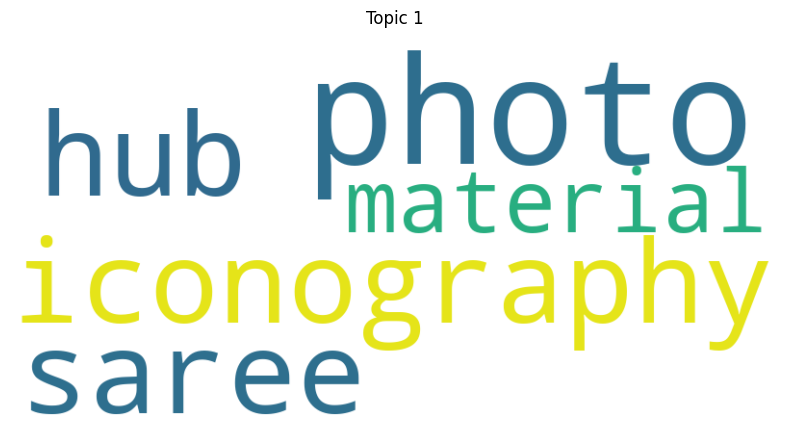

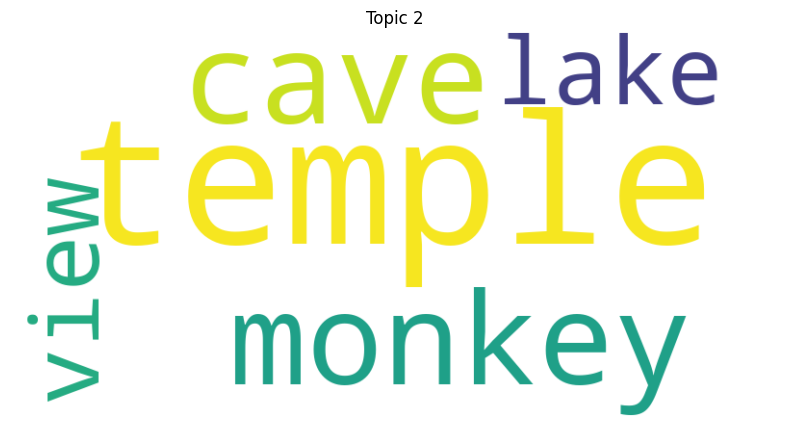

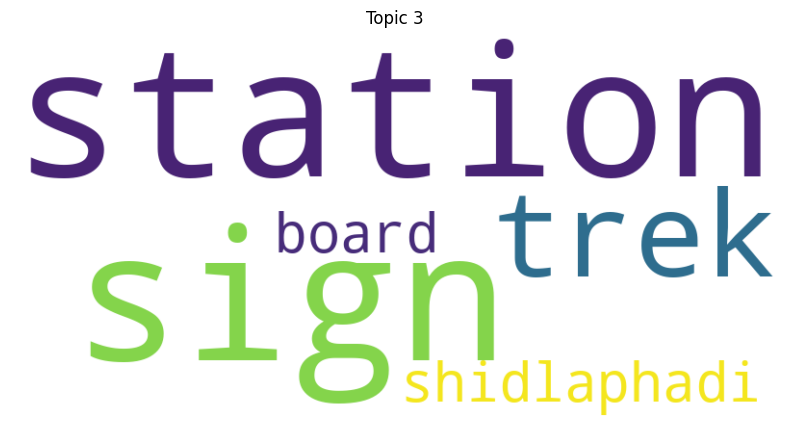

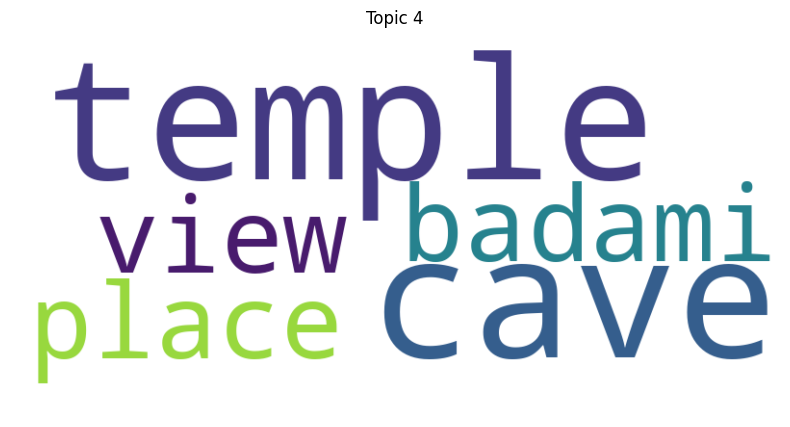

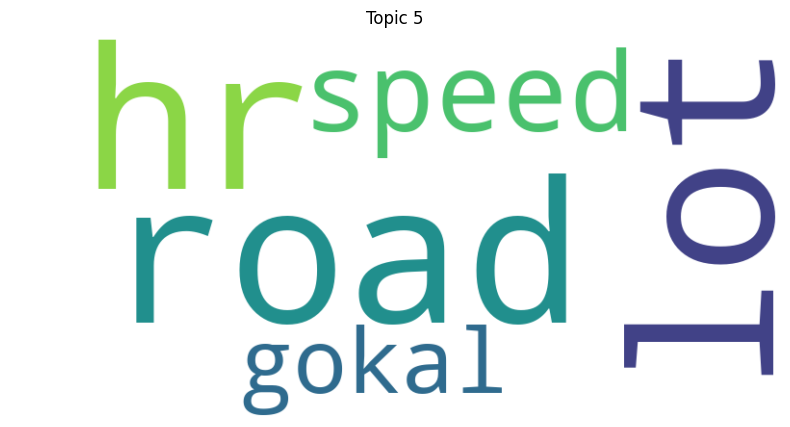

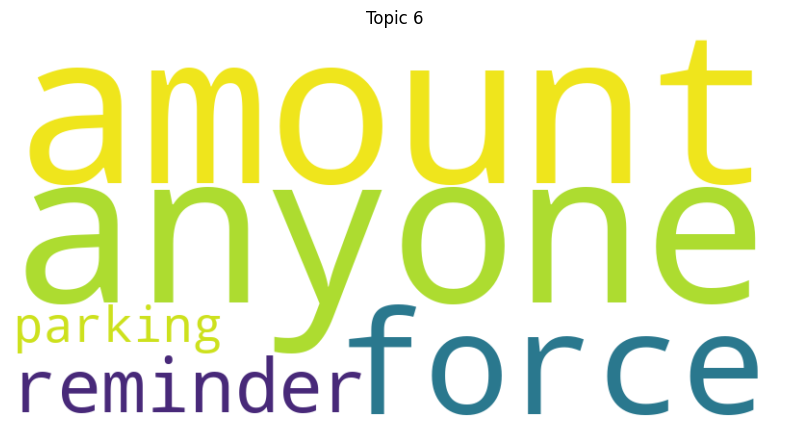

In [76]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming you already have 'topics' and 'topic_terms' lists

# Create word clouds for each topic
for idx in range(topic_count):
    terms_str = ' '.join(topic_terms[idx])
    
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(terms_str)

    # Plot the WordCloud image                        
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(topics[idx])
    plt.show()

## GPT-2

In [77]:
import torch
from transformers import GPT2Tokenizer, GPT2Model
import numpy as np
from sklearn.cluster import KMeans

model_name = "gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2Model.from_pretrained(model_name)

def get_gpt_embeddings(text):
    input_ids = torch.tensor(tokenizer.encode(text)).unsqueeze(0)
    with torch.no_grad():
        outputs = model(input_ids)
        embeddings = outputs.last_hidden_state[:, -1, :].numpy()

    return embeddings




def get_gpt_embeddings_for_topics(lda_topics):
    topic_embeddings = []
    for topic in lda_topics:
        topic_text = " ".join([id2word[term[0]] for term in topic]) 
        embeddings = get_gpt_embeddings(topic_text)
        topic_embeddings.append(embeddings)
    return topic_embeddings

lda_topics = [lda_model.get_topic_terms(topic_idx, topn=5) for topic_idx in range(topic_count)]  # Adjust the number of topics

gpt_embeddings_lda_topics = get_gpt_embeddings_for_topics(lda_topics)

gpt_embeddings_flat = np.array(gpt_embeddings_lda_topics).reshape(len(gpt_embeddings_lda_topics), -1)


## Sihoullete score

In [79]:
from geneticalgorithm import geneticalgorithm as ga
from sklearn.cluster import KMeans

num_clusters_kmeans = 3
kmeans = KMeans(n_clusters=num_clusters_kmeans, random_state=47)

kmeans.fit(gpt_embeddings_flat)


cluster_assignments_kmeans = kmeans.labels_
print("Without Genetic Algorithm",cluster_assignments_kmeans)
from sklearn.metrics import silhouette_score

# Calculate the Silhouette Score for K-Means clusters
The silhouette score is calculated to assess the quality of clustering.
print(f"Silhouette Score: {silhouette_avg}")


Without Genetic Algorithm [0 2 0 2 0 1]
Silhouette Score: 0.2137642502784729


C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

For k = 2, predicted assignments are [0 0 0 0 0 1]
0.35368547
For k = 3, predicted assignments are [0 2 0 2 0 1]
0.21376425
For k = 4, predicted assignments are [3 0 1 0 1 2]
0.19656546
For k = 5, predicted assignments are [3 0 1 0 4 2]
0.118578464
Optimal k: 2
Cluster assignments for optimal k: [0 0 0 0 0 1]


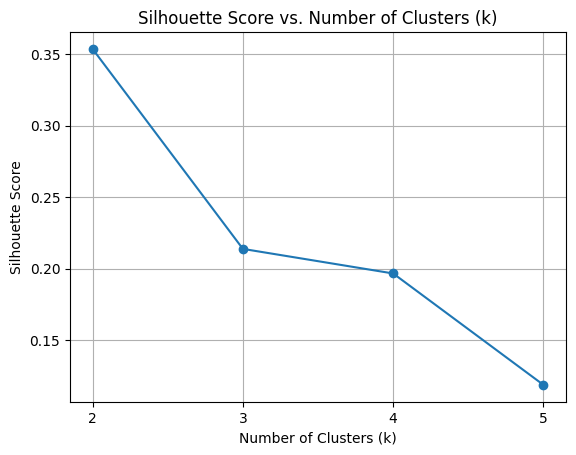

In [80]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Initialize the global variable
max_silhouette_score = -1
optimal_k = None
optimal_cluster_assignments = None

# Function to calculate the silhouette score for a given number of clusters
def get_silhouette_score(k):
    global max_silhouette_score, optimal_k, optimal_cluster_assignments
    
    kmeans = KMeans(n_clusters=k, random_state=47)
    kmeans.fit(gpt_embeddings_flat)
    cluster_assignments_kmeans = kmeans.labels_
    print(f"For k = {k}, predicted assignments are {cluster_assignments_kmeans}")
    silhouette_avg = silhouette_score(gpt_embeddings_flat, kmeans.labels_)
    print(silhouette_avg)
    if silhouette_avg > max_silhouette_score:
        max_silhouette_score = silhouette_avg
        optimal_k = k
        optimal_cluster_assignments = cluster_assignments_kmeans
    
    return silhouette_avg

k_values = list(range(2, (len(kmeans.labels_) // 2) + 3))
# Calculate silhouette scores for each k
silhouette_scores = [get_silhouette_score(k) for k in k_values]

# Print the optimal k and its corresponding cluster assignments
print(f"Optimal k: {optimal_k}")
print(f"Cluster assignments for optimal k: {optimal_cluster_assignments}")

# Plot the silhouette scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)
plt.show()


# Coherence Score

In [81]:
from gensim.models import CoherenceModel


coherence_model_lda_updated = CoherenceModel(
    model=lda_model,  
    texts=final_rev_words,  
    dictionary=id2word, 
    coherence='c_v'  
)

coherence_lda_updated = coherence_model_lda_updated.get_coherence()
print('\nUpdated Coherence Score: ', coherence_lda_updated)



Updated Coherence Score:  0.6494674060177207


# Final Clusters 

In [82]:
clustered_topics = {i: [] for i in range(optimal_k)}
top_terms_per_cluster = {i: [] for i in range(optimal_k)}
cluster_terms_lists = []

for idx, cluster_assignment in enumerate(optimal_cluster_assignments):
    clustered_topics[cluster_assignment].append((f'Topic {idx + 1}', topic_terms[idx]))

for cluster_idx, topics_in_cluster in clustered_topics.items():
    # Extract top terms from each cluster
    top_terms = [term for _, terms in topics_in_cluster for term in terms]

    # Store the top terms in the dictionary
    top_terms_per_cluster[cluster_idx] = top_terms

    # Combine the terms to create the word cloud text
    cluster_text = ' '.join(top_terms)

    # Generate the word cloud or perform other tasks as needed

    # Append the top terms for the current cluster to the list
    cluster_terms_lists.append(top_terms)

# Print or use the top terms for each cluster
for cluster_idx, top_terms in top_terms_per_cluster.items():
    print(f"Cluster {cluster_idx} - Top Terms: {', '.join(top_terms)}")

# Access each cluster's top terms as separate lists
for cluster_idx, terms_list in enumerate(cluster_terms_lists):
    print(f"Cluster {cluster_idx} - Top Terms List: {terms_list}")


Cluster 0 - Top Terms: photo, iconography, hub, saree, material, temple, monkey, cave, lake, view, station, sign, trek, shidlaphadi, board, cave, temple, badami, place, view, road, hr, lot, speed, gokal
Cluster 1 - Top Terms: anyone, amount, force, reminder, parking
Cluster 0 - Top Terms List: ['photo', 'iconography', 'hub', 'saree', 'material', 'temple', 'monkey', 'cave', 'lake', 'view', 'station', 'sign', 'trek', 'shidlaphadi', 'board', 'cave', 'temple', 'badami', 'place', 'view', 'road', 'hr', 'lot', 'speed', 'gokal']
Cluster 1 - Top Terms List: ['anyone', 'amount', 'force', 'reminder', 'parking']


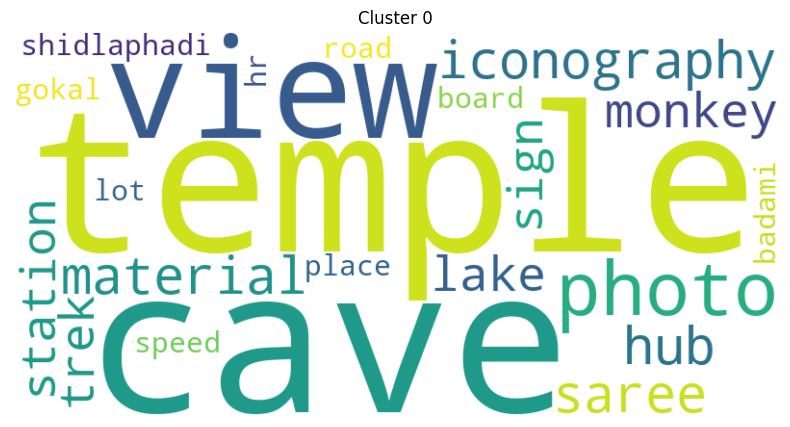

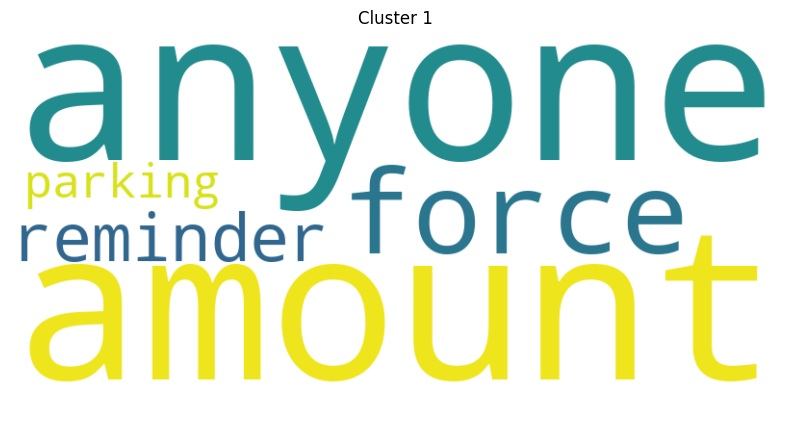

In [83]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


clustered_topics = {i: [] for i in range(optimal_k)}


for idx, cluster_assignment in enumerate(optimal_cluster_assignments):
    clustered_topics[cluster_assignment].append((f'Topic {idx + 1}', topic_terms[idx]))

for cluster_idx, topics_in_cluster in clustered_topics.items():
    cluster_text = ' '.join([term for _, terms in topics_in_cluster for term in terms])

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_text)

    # Plot the WordCloud image
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Cluster {cluster_idx}')
    plt.show()
